In [3]:
# %matplotlib notebook

import os
import matplotlib.pyplot
from data_layout import LayoutDataset
from vis_utils_layout import draw_partnet_objects

matplotlib.pyplot.ion()

# ground-truth data directory
root_dir = '/home/weiran/Project/Layout-TVCG23/data/publay_test_0226_output/'


In [2]:
# load one data
obj = LayoutDataset.load_object(os.path.join(root_dir, '1_488_layout.json'))
obj.load_category_info('magazine')

# print the hierarchical structure
print('PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)')
print(obj)

PartNet Hierarchy: (the number in bracket corresponds to PartNet part_id)
0 vertical_branch    {1} 1 Box(tensor([0.0100, 0.0100, 0.6800, 0.7500]))
  ├0 text [LEAF] {2} 5 Box(tensor([0.1600, 0.0100, 0.3800, 0.1800]))
  ├1 image [LEAF] {3} 4 Box(tensor([0.0100, 0.2200, 0.6800, 0.4400]))
  ├2 image [LEAF] {4} 4 Box(tensor([0.2800, 0.6900, 0.1400, 0.0700]))



In [3]:
obj.root.children[0].get_box()

tensor([[0.2206, 0.0000, 0.5588, 0.2400]])

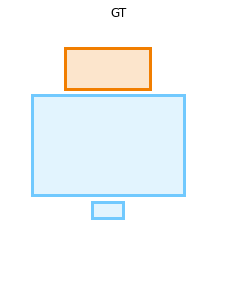

In [4]:
# obj = LayoutDataset.load_object(os.path.join(root_dir, '110.json'))
# obj = LayoutDataset.load_object(os.path.join(root_dir, '7.json'))
ob = obj

draw_partnet_objects(objects=[obj], object_names=['GT'],
                     figsize=(4, 5), leafs_only=True,
                     sem_colors_filename='./part_colors_magazine.txt')

In [6]:
ob.root.children[0].absbox

tensor([[0.0000, 0.0000, 1.0000, 0.2138]])

In [7]:
ob.root.children[0].box

tensor([0.0000, 0.0000, 1.0000, 0.2138])

In [ ]:
# ground-truth data directory
root_dir = './data/magazine_rand'

# read all data
obj_list = sorted([int(item.split('.')[0]) for item in os.listdir(root_dir) if item.endswith('.json')])
# print(len(obj_list))

# visualize all data
for obj in obj_list:
    obj = LayoutDataset.load_object(os.path.join(root_dir, str(obj)+'.json'))
    draw_partnet_objects(objects=[obj], object_names=['Layout'],
                        figsize=(5, 5), leafs_only=True,
                        sem_colors_filename='./part_colors_magazine.txt')

In [4]:
obj_list = [item.split('.')[0] for item in os.listdir(root_dir) if item.endswith('.json')]

out_dir = '/home/weiran/Project/Layout-TVCG23/data/publay_test_0226_pic/'

for obj in obj_list:
    arrbox = LayoutDataset.load_object(os.path.join(root_dir, str(obj)+'.json'))
    arrbox.get_arrbox()
    draw_partnet_objects(objects=[arrbox], object_names=['Layout'], 
                        figsize=(5, 5), leafs_only=True,
                        sem_colors_filename='./part_colors_magazine.txt',
                        out_fn=os.path.join(out_dir, obj + '.png'))